<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# fxcmpy  - a python wrapper for the FXCM API

#### By
#### Michael Schwed
#### The Python Quants GmbH
#### August 2017

The import 

In [1]:
import fxcmpy
import importlib
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook


In [ ]:
importlib.reload(fxcmpy)

## Creating an instance of fxcmpy.

This is, as usually, done by the class constructor. 

**fxcmpy(user='', password='', config_file='', log_file='', log_level='')**, where

* **user**: is the user name as provided by **FXCM**
* **password**: is the user's password
* **config_file**: the path to an optional configuration file containing values for the other parameter.
* **log_file**: the path to a log file. If not given, log messages are print to stdout.
* **log_level**: Determines the granularity of the log messages. Possible values are : *error*, *warn*, *info* and *debug*. Default is *warn*

If one or more of the arguments *user*, *password*, *log_file* or *log_level* are not given, fxcmpy checks the value of config_file, if it points to an existing configuration file, fxcmpy tries to read the missing arguments from that file. 

In [2]:
con = fxcmpy.fxcmpy(user='d101537826', password='1234', log_level='info')

|INFO|2017-08-11 14:16:47,169|Connecting FXCM Server for user d101537826|
|INFO|2017-08-11 14:16:47,170|Requesting access token...|
|INFO|2017-08-11 14:16:47,544|Received temporary token 13b1f829ca898628925ec0f30ee7a88dbc7df2e0|
|INFO|2017-08-11 14:16:50,334|Received access token|
|INFO|2017-08-11 14:16:51,138|Connection established|


In [3]:
con.is_connected()

True

## Available instruments

To get the available instruments, use the method 

**get_instruments()**

Returns a list of the symbols of the available instruments.

In [4]:
con.get_instruments()

['EUR/USD',
 'USD/JPY',
 'GBP/USD',
 'USD/CHF',
 'EUR/CHF',
 'AUD/USD',
 'USD/CAD',
 'NZD/USD',
 'EUR/GBP',
 'EUR/JPY',
 'GBP/JPY',
 'CHF/JPY',
 'GBP/CHF',
 'EUR/AUD',
 'EUR/CAD',
 'AUD/CAD',
 'AUD/JPY',
 'CAD/JPY',
 'NZD/JPY',
 'GBP/CAD',
 'GBP/NZD',
 'GBP/AUD',
 'AUD/NZD',
 'USD/SEK',
 'EUR/SEK',
 'EUR/NOK',
 'USD/NOK',
 'USD/MXN',
 'AUD/CHF',
 'EUR/NZD',
 'EUR/CZK',
 'USD/CZK',
 'USD/ZAR',
 'USD/HKD',
 'ZAR/JPY',
 'USD/TRY',
 'EUR/TRY',
 'NZD/CHF',
 'CAD/CHF',
 'NZD/CAD',
 'TRY/JPY',
 'USD/CNH',
 'AUS200',
 'ESP35',
 'FRA40',
 'GER30',
 'HKG33',
 'JPN225',
 'NAS100',
 'SPX500',
 'UK100',
 'US30',
 'Copper',
 'EUSTX50',
 'USDOLLAR',
 'USOil',
 'UKOil',
 'NGAS',
 'Bund',
 'XAU/USD',
 'XAG/USD']

## Subscribing for market data

You can subscribe for market data with the method 

**subscribe_market_data(symbol, add_callbacks=list())**, where

* **symbol**: is the symbol of an available instrument as given by *get_instruments()*
* **add_callbacks**: a list of methods. Default is an empty list. A typical callback function has to     
  look as follows:
  
  **callback_function(data, dataframe)**, where
  * **data**: is a *json* object.
  * **dataframe**: is a *Pandas DataFrame* object.


The method creates a stream of the symbols data. That data will be stored in a *Pandas DataFrame* object. After that, the methods found in *add_callbacks* are called with the data send by the server and the *Pandas DataFrame*, the data is stored in.


In [5]:
con.subscribe_market_data('EUR/USD')

|INFO|2017-08-11 14:16:58,086|Try to subscribe for EUR/USD|


The object will remember subscribed symbols and their values. 

In [6]:
symbols = con.get_subscribed_symbols()

In [7]:
print(symbols)

['EUR/USD']


In [8]:
con.is_subscribed('EUR/USD')

True

Prices for a symbol are collected in a *Pandas DataFrame*

In [9]:
con.get_prices('EUR/USD')

,Bid,High,Low,Close
2017-08-11 12:16:58,1.17646,1.17671,1.17806,1.17476
2017-08-11 12:16:59,1.17646,1.17671,1.17806,1.17476
2017-08-11 12:16:59,1.17646,1.17669,1.17806,1.17476
2017-08-11 12:16:59,1.17645,1.17669,1.17806,1.17476
2017-08-11 12:17:00,1.17645,1.17668,1.17806,1.17476
2017-08-11 12:17:01,1.17646,1.17669,1.17806,1.17476
2017-08-11 12:17:01,1.17648,1.17672,1.17806,1.17476
2017-08-11 12:17:02,1.17649,1.17672,1.17806,1.17476
2017-08-11 12:17:04,1.17649,1.17673,1.17806,1.17476
2017-08-11 12:17:05,1.17649,1.17672,1.17806,1.17476


Unsubscribe works in the same way:

In [10]:
con.unsubscribe_market_data('EUR/USD')

|INFO|2017-08-11 14:17:09,169|Try to unsubscribe for EUR/USD|


In [11]:
con.is_subscribed('EUR/USD')

False

In [12]:
con.get_prices('EUR/USD')

,Bid,High,Low,Close


### Additional callbacks

As an example, we define a method called test, that method prints new incoming data and also the length of the *Pandas DataFrame* storing the data.

In [14]:
def test(data, dataframe):
    print('New values received for %s: %s, %s, %s, %s, %s' 
          %(data['Symbol'], pd.to_datetime(int(data['Updated']), unit='s'), 
            data['Rates'][0], data['Rates'][1], data['Rates'][2], data['Rates'][3]))
    print('Length of the Pandas Dataframe: %s' %len(dataframe))

Now, we subscribe to the 'EUR/USD' again. To stop the notebook from generating output, just execute the very next cell.

In [15]:
con.subscribe_market_data('EUR/USD', (test,))

|INFO|2017-08-11 13:47:05,866|Try to subscribe for EUR/USD|
|INFO|2017-08-11 13:47:05,867|Adding callback method test for symbol EUR/USD|


In [16]:
con.unsubscribe_market_data('EUR/USD')

|INFO|2017-08-11 13:47:06,649|Try to unsubscribe for EUR/USD|


### Callbacks with global variables

To use other variables than the *json* and the *DataFrame* objects in your callbacks, use *globals*.
As an example, we create an empty plot and define a callback which updates that plot everytime new data is received. 

<IPython.core.display.Javascript object>


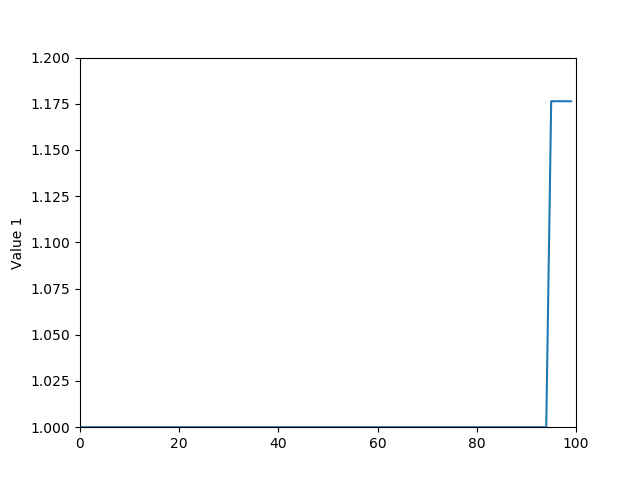

In [17]:
x = np.arange(100)
y = 100*[1,]
fig,ax = plt.subplots(1,1)
ax.set_ylabel('Value 1')
ax.set_xlim(0,100)
ax.set_ylim(1,1.2)
ax.plot(x,y)

Here is the definition of the new callback method. Please note that we declared the variables *y*, *fig* and *ax* as *global*, which means that they refer to the according variables defined in the cell above.

In [18]:
def update_plot(data, df):
    global y
    global fig
    global ax
    new_y = data['Rates'][0]
    y = y[1:]
    y.append(new_y)
    ax.lines[0].set_ydata(y)
    fig.canvas.draw()


Let's start the stream. After that you can observe how the plot above updates.

In [19]:
con.subscribe_market_data('EUR/USD', (update_plot, ))

|INFO|2017-08-11 13:47:19,769|Try to subscribe for EUR/USD|
|INFO|2017-08-11 13:47:19,770|Adding callback method update_plot for symbol EUR/USD|


In [20]:
con.unsubscribe_market_data('EUR/USD')

|INFO|2017-08-11 13:47:29,706|Try to unsubscribe for EUR/USD|


### Models

Data about your account and the market are stored in so called *models*. To fetch that data,
use 

**get_model(models=list())**, where

* **models**: is a list containing the desired models. Thereby the single values have to be one of
  *Account*, *ClosedPosition*, *LeverageProfile*, *Offer*, *OpenPosition*, *Order*, *Properties* or *Summary*.

In [21]:
con.get_model(models=('Account','Order'))

{'accounts': [{'accountId': '2555956',
   'accountName': '02555956',
   'balance': 697145.51,
   'dayPL': -1833.87556,
   'equity': 699309.22444,
   'grossPL': 2163.71444,
   'hedging': 'N',
   'mc': 'N',
   'ratePrecision': 0,
   't': 6,
   'usableMargin': 662825.22444,
   'usableMargin3': 626341.22444,
   'usableMargin3Perc': 89.5657,
   'usableMarginPerc': 94.78285,
   'usdMr': 36484,
   'usdMr3': 72968},
  {'accountId': '',
   'accountName': '',
   'balance': 697145.51,
   'dayPL': -1833.87556,
   'equity': 699309.22444,
   'grossPL': 2163.71444,
   'hedging': '',
   'isTotal': True,
   'mc': '',
   'ratePrecision': 0,
   't': 6,
   'usableMargin': 662825.22444,
   'usableMargin3': 626341.22444,
   'usableMargin3Perc': 89.5657,
   'usableMarginPerc': 94.78285,
   'usdMr': 36484,
   'usdMr3': 72968}],
 'orders': [{'accountId': '2555956',
   'accountName': '02555956',
   'amountK': 100,
   'buy': 1,
   'currency': 'EUR/USD',
   'currencyPoint': 10,
   'isBuy': True,
   'isELSOrder': 

There are shortcuts for the models *ClosedPosition*, *Offer*, *OpenPosition* and *Order*, namely

**get_open_positions(kind='dataframe')**

**get_closed_positions(kind='dataframe')**

**get_offers(kind='dataframe')**

**get_orders(kind='dataframe')**,

where

* **kind**: is either *dataframe* (default) or *list* and determines the shape of the return. 

In [22]:
con.get_orders()

,accountId,accountName,amountK,buy,currency,currencyPoint,isBuy,isELSOrder,isEntryOrder,isLimitOrder,...,sell,status,stop,stopMove,stopPegBaseType,stopRate,t,time,timeInForce,type
0,2555956,02555956,100,1,EUR/USD,10.0,True,False,True,True,...,0,1,0,0,-1,0,3,08102017102933,GTC,LE
1,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017113934,GTC,LE
2,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017113839,GTC,LE
3,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017114249,GTC,LE
4,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017113849,GTC,LE


In [23]:
con.get_orders(kind='list')

[{'accountId': '2555956',
  'accountName': '02555956',
  'amountK': 100,
  'buy': 1,
  'currency': 'EUR/USD',
  'currencyPoint': 10,
  'isBuy': True,
  'isELSOrder': False,
  'isEntryOrder': True,
  'isLimitOrder': True,
  'isNetQuantity': False,
  'isStopOrder': False,
  'limit': 1.08,
  'limitPegBaseType': -1,
  'limitRate': 1.08,
  'ocoBulkId': 0,
  'orderId': '330277567',
  'range': 0,
  'ratePrecision': 5,
  'sell': 0,
  'status': 1,
  'stop': 0,
  'stopMove': 0,
  'stopPegBaseType': -1,
  'stopRate': 0,
  't': 3,
  'time': '08102017102933',
  'timeInForce': 'GTC',
  'type': 'LE'},
 {'accountId': '2555956',
  'accountName': '02555956',
  'amountK': 5,
  'buy': 1,
  'currency': 'EUR/USD',
  'currencyPoint': 0.5,
  'isBuy': True,
  'isELSOrder': False,
  'isEntryOrder': True,
  'isLimitOrder': True,
  'isNetQuantity': False,
  'isStopOrder': False,
  'limit': 1.08,
  'limitPegBaseType': -1,
  'limitRate': 1.08,
  'ocoBulkId': 0,
  'orderId': '330356342',
  'range': 0,
  'ratePrecisi

<div style='color:red'><b>Note about models:</b> Should we provide support for all models or should we drop the technical models as for example <i>properties</i></div>

## Historical data

To fetch market data for a given instrument use the method 

**get_candles(offer_id, period, number, start=None, stop=None)**

where

* **offer_id**: Is a reference to an member of the *Offer* model, which defines the instrument to fetch data for.
* **period_id**: Must be one of *m1*, *m5*, *m15*, *m30*, *H1*, *H2*, *H3*, *H4*, *H6*, *H8*, *D1*, *W1* or *M1* and determines the period of the candles.
* **number**: The number of candles to retrieve, maximum is 10000.
* **start**: A *datetime* object. The first date, candles are retrieved for. If not given, that date is derived from the *stop* date, the period and the number of candles.
* **stop**: A *datetime* object. The last date, candles are retrieved for. If not given, the day before the current date is used.

In [24]:
offers = con.get_offers()

In [25]:
offers[['currency', 'offerId']]

,currency,offerId
0,EUR/USD,1
1,USD/JPY,2
2,GBP/USD,3
3,USD/CHF,4
4,AUD/USD,6
5,USD/CAD,7
6,NZD/USD,8
7,GER30,1004
8,UK100,1012
9,Copper,1016


In [26]:
candles = con.get_candles(offer_id=1, period='D1', number=10)
candles

,date,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
0,2017-07-30 21:00:00,1.17447,1.18403,1.18444,1.17221,1.17523,1.18428,1.18473,1.17244,282104
1,2017-07-31 21:00:00,1.18402,1.18009,1.18433,1.17839,1.18428,1.18033,1.18463,1.17863,293101
2,2017-08-01 21:00:00,1.18009,1.18545,1.19092,1.17924,1.18033,1.18582,1.19121,1.17949,295923
3,2017-08-02 21:00:00,1.18545,1.18666,1.18918,1.18294,1.18582,1.18700,1.18944,1.18317,284911
4,2017-08-03 21:00:00,1.18666,1.17720,1.18882,1.17270,1.18700,1.17757,1.18904,1.17294,303251
5,2017-08-05 21:00:00,1.17677,1.17700,1.17785,1.17677,1.17752,1.17768,1.17870,1.17734,398
6,2017-08-06 21:00:00,1.17701,1.17928,1.18130,1.17692,1.17768,1.17969,1.18155,1.17725,205408
7,2017-08-07 21:00:00,1.17928,1.17513,1.18229,1.17139,1.17969,1.17549,1.18252,1.17165,249828
8,2017-08-08 21:00:00,1.17513,1.17558,1.17627,1.16876,1.17548,1.17592,1.17652,1.16902,323356
9,2017-08-09 21:00:00,1.17559,1.17714,1.17844,1.17030,1.17593,1.17746,1.17865,1.17054,304321


In [27]:
start = dt.datetime(2017, 7, 1)
stop = dt.datetime(2017, 8, 1)
candles = con.get_candles(offer_id=1, period='W1', number=10, start=start, stop=stop)
candles

,date,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
0,2017-06-23 20:00:00,1.11627,1.11911,1.12078,1.11382,1.11649,1.11945,1.12101,1.11406,783992
1,2017-06-30 20:00:00,1.11911,1.14162,1.14445,1.11707,1.11945,1.14253,1.14467,1.11729,2048632
2,2017-06-30 20:00:00,1.11918,1.14162,1.14445,1.11707,1.11996,1.14253,1.14467,1.11729,1656636
3,2017-07-07 20:00:00,1.14144,1.13992,1.14274,1.13112,1.14261,1.14027,1.14298,1.13137,1242984
4,2017-07-07 20:00:00,1.14162,1.13992,1.14274,1.13112,1.14254,1.14027,1.14298,1.13137,1242984
5,2017-07-14 20:00:00,1.14160,1.14642,1.14707,1.13694,1.14187,1.14702,1.14731,1.13715,1063886
6,2017-07-21 20:00:00,1.15744,1.16622,1.16817,1.14781,1.15767,1.16658,1.16843,1.14804,1959895
7,2017-07-28 20:00:00,1.16535,1.17481,1.17757,1.16115,1.16559,1.17513,1.17782,1.16139,1096528
8,2017-07-28 20:00:00,1.16622,1.17481,1.17757,1.16115,1.16658,1.17513,1.17782,1.16139,2586664
9,2017-08-04 20:00:00,1.17481,1.17720,1.19092,1.17221,1.17513,1.17757,1.19121,1.17244,1459453


<div style='color:red'><b>Notes to candles:</b> The parameter *start* and *stop*, (which become to *From* and *To* in the request to the FXCM Server) seems to have no effect. I have tried to omit the parameter *number* but then, the connection breaks and I am banned for several minutes (approx. 15)

## Trades and Orders

### Trades

To open a trade use the method

**open_trade(account_id, symbol, side, amount, time_in_force,rate=0, stop=None, trailing_step=None)**, where

* **account_id**: the id of the account the order is placed.
* **symbol**: the symbol of the instrument of the order.
* **side**: 'true' for a buy and 'false' for a sell.
* **amount**: the trade‘s amount in lots.
* **time_in_force**: time in force choices. One of 'IOC', 'GTC', 'FOK', 'DAY' or 'GTD'.
* **rate**: the trade's rate, default is 0.
* **stop**: the trade's stop rate. Default is *None*
* **trailing_step**: the trailing step for the stop rate Default is *None*

The effect of open_trade can be seen in the models closedPosition and / or openPosition, so let's have a look on both bevor creating an order:

In [28]:
con.get_closed_positions()

,accountName,amountK,close,closeTime,com,currency,currencyPoint,grossPL,isBuy,isTotal,open,openTime,ratePrecision,roll,t,tradeId,valueDate,visiblePL
0,02555956,1000,109.064,08112017102912,100,USD/JPY,91.68256,-155.87,False,NaN,109.047,08112017102700,3,0,2,141906563,,-1.7
1,,1000,0.000,None,100,USD/JPY,0.00000,-155.87,False,True,0.000,None,0,0,2,,,-1.7


In [29]:
con.get_open_positions()

,accountId,accountName,amountK,close,com,currency,currencyPoint,grossPL,isBuy,isDisabled,...,ratePrecision,roll,stop,stopMove,t,time,tradeId,usedMargin,valueDate,visiblePL
0,2555956,02555956,50,1.17641,2.50,EUR/USD,5.00000,99.50000,True,False,...,5,-14.72,0,0,1,08092017100412,141848116,650,,19.9
1,2555956,02555956,1111,1.17641,55.55,EUR/USD,111.10000,2299.77000,True,False,...,5,-327.08,0,0,1,08092017105006,141848762,14443,,20.7
2,2555956,02555956,17,1.17641,0.85,EUR/USD,1.70000,43.86000,True,False,...,5,-5.00,0,0,1,08092017111045,141849008,221,,25.8
3,2555956,02555956,15,1.17641,0.75,EUR/USD,1.50000,40.65000,True,False,...,5,-4.41,0,0,1,08092017112056,141849136,195,,27.1
4,2555956,02555956,15,1.17641,0.75,EUR/USD,1.50000,40.20000,True,False,...,5,-4.41,0,0,1,08092017112247,141849142,195,,26.8
5,2555956,02555956,15,1.17641,0.75,EUR/USD,1.50000,34.80000,True,False,...,5,-4.41,0,0,1,08092017113258,141849292,195,,23.2
6,2555956,02555956,15,1.17641,0.75,EUR/USD,1.50000,38.40000,True,False,...,5,-4.41,0,0,1,08092017113458,141849310,195,,25.6
7,2555956,02555956,15,1.17641,0.75,EUR/USD,1.50000,38.70000,True,False,...,5,-4.41,0,0,1,08092017113515,141849317,195,,25.8
8,2555956,02555956,15,1.17641,0.75,EUR/USD,1.50000,36.90000,True,False,...,5,-4.41,0,0,1,08092017113641,141849330,195,,24.6
9,2555956,02555956,1000,109.08300,50.00,USD/JPY,91.68214,-412.52991,False,False,...,3,0.00,0,0,1,08112017102851,141906575,20000,,-4.5


In [30]:
con.open_trade(account_id='2555956', symbol='USD/JPY' , side='true', 
               amount='1000', time_in_force='GTC')

{'response': {'executed': True}, 'data': None}


And now a look on the updated models:

In [31]:
con.get_closed_positions()

,accountName,amountK,close,closeTime,com,currency,currencyPoint,grossPL,isBuy,isTotal,open,openTime,ratePrecision,roll,t,tradeId,valueDate,visiblePL
0,02555956,1000,109.064,08112017102912,100,USD/JPY,91.67752,-155.87,False,NaN,109.047,08112017102700,3,0,2,141906563,,-1.7
1,02555956,1000,109.084,08112017114804,100,USD/JPY,91.67752,-421.69,False,NaN,109.038,08112017102851,3,0,2,141906575,,-4.6
2,,2000,0.000,None,200,USD/JPY,0.00000,-577.56,False,True,0.000,None,0,0,2,,,-6.3


In [32]:
con.get_open_positions()

,accountId,accountName,amountK,close,com,currency,currencyPoint,grossPL,isBuy,isDisabled,...,ratePrecision,roll,stop,stopMove,t,time,tradeId,usedMargin,valueDate,visiblePL
0,2555956,02555956,50,1.17639,2.50,EUR/USD,5.0,98.50,True,False,...,5,-14.72,0,0,1,08092017100412,141848116,650,,19.7
1,2555956,02555956,1111,1.17639,55.55,EUR/USD,111.1,2277.55,True,False,...,5,-327.08,0,0,1,08092017105006,141848762,14443,,20.5
2,2555956,02555956,17,1.17639,0.85,EUR/USD,1.7,43.52,True,False,...,5,-5.00,0,0,1,08092017111045,141849008,221,,25.6
3,2555956,02555956,15,1.17639,0.75,EUR/USD,1.5,40.35,True,False,...,5,-4.41,0,0,1,08092017112056,141849136,195,,26.9
4,2555956,02555956,15,1.17639,0.75,EUR/USD,1.5,39.90,True,False,...,5,-4.41,0,0,1,08092017112247,141849142,195,,26.6
5,2555956,02555956,15,1.17639,0.75,EUR/USD,1.5,34.50,True,False,...,5,-4.41,0,0,1,08092017113258,141849292,195,,23.0
6,2555956,02555956,15,1.17639,0.75,EUR/USD,1.5,38.10,True,False,...,5,-4.41,0,0,1,08092017113458,141849310,195,,25.4
7,2555956,02555956,15,1.17639,0.75,EUR/USD,1.5,38.40,True,False,...,5,-4.41,0,0,1,08092017113515,141849317,195,,25.6
8,2555956,02555956,15,1.17639,0.75,EUR/USD,1.5,36.60,True,False,...,5,-4.41,0,0,1,08092017113641,141849330,195,,24.4
9,,,1268,0.00000,63.40,EUR/USD,0.0,2647.42,False,False,...,0,-373.26,0,0,1,None,,0,,217.7


### Entry orders

To create an Entry Order, use the method 

**create_entry_order(account_id, symbol, side, amount, limit, is_in_pips, time_in_force, rate=0, stop=None, trailing_step=None)**

where

* **account_id**: the id of the trader's account.
* **symbol**: the symbol of the instrument of the order.
* **side**: 'true' for a buy and 'false' for a sell.
* **amount**: the trade‘s amount in lots.
* **limit**: the trade's limit rate.
* **is_in_pips**: defines if the trade's stop / limit rate is in pips. 
* **time_in_force**: time in force choices. One of 'GTC', 'DAY' or 'GTD'.
* **rate**: the trade's rate, default is 0.
* **stop**: the trade's stop rate. Default is *None*.
* **trailing_step**: the trailing step for the stop rate. Default is *None*.



Open orders can be found in the *Order* model. Let's have a look on the model before and after creating an Entry Order:

In [33]:
con.get_orders()

,accountId,accountName,amountK,buy,currency,currencyPoint,isBuy,isELSOrder,isEntryOrder,isLimitOrder,...,sell,status,stop,stopMove,stopPegBaseType,stopRate,t,time,timeInForce,type
0,2555956,02555956,100,1,EUR/USD,10.0,True,False,True,True,...,0,1,0,0,-1,0,3,08102017102933,GTC,LE
1,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017113934,GTC,LE
2,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017113839,GTC,LE
3,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017114249,GTC,LE
4,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017113849,GTC,LE


In [34]:
con.create_entry_order(account_id='2555956', symbol='EUR/USD', side='true', 
                       amount=111, limit=1.08, is_in_pips = 'false',
                       time_in_force='GCT', rate=1, stop=None, trailing_step=None)

{'response': {'executed': True}, 'data': None}


In [35]:
con.get_orders()

,accountId,accountName,amountK,buy,currency,currencyPoint,isBuy,isELSOrder,isEntryOrder,isLimitOrder,...,sell,status,stop,stopMove,stopPegBaseType,stopRate,t,time,timeInForce,type
0,2555956,02555956,100,1,EUR/USD,10.0,True,False,True,True,...,0,1,0,0,-1,0,3,08102017102933,GTC,LE
1,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017113934,GTC,LE
2,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017113839,GTC,LE
3,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017114249,GTC,LE
4,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017113849,GTC,LE
5,2555956,02555956,111,1,EUR/USD,11.1,True,False,True,True,...,0,1,0,0,-1,0,3,08112017114811335,GTC,LE


To change an order use the method

**change_order(order_id, amount, rate=0, order_range=0, trailing_step=None)** 

where

* **order_id**: is the identifier of the order to change. Can be found in the *order* model.
* **amount**: the trades amount.
* **rate**: the order's new rate.
* **order_range**: the order's range.
* **trailing_step**: the trailing step for the stop rate. Default is *None*.

First, we want to find out the order id of the pervious created order.

In [36]:
orders = con.get_orders()
orders

,accountId,accountName,amountK,buy,currency,currencyPoint,isBuy,isELSOrder,isEntryOrder,isLimitOrder,...,sell,status,stop,stopMove,stopPegBaseType,stopRate,t,time,timeInForce,type
0,2555956,02555956,100,1,EUR/USD,10.0,True,False,True,True,...,0,1,0,0,-1,0,3,08102017102933,GTC,LE
1,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017113934,GTC,LE
2,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017113839,GTC,LE
3,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017114249,GTC,LE
4,2555956,02555956,5,1,EUR/USD,0.5,True,False,True,True,...,0,1,0,0,-1,0,3,08112017113849,GTC,LE
5,2555956,02555956,111,1,EUR/USD,11.1,True,False,True,True,...,0,1,0,0,-1,0,3,08112017114811335,GTC,LE


In [37]:
orders[['orderId', 'currency', 'amountK', 'isBuy', 'buy']]

,orderId,currency,amountK,isBuy,buy
0,330277567,EUR/USD,100,True,1
1,330356342,EUR/USD,5,True,1
2,330356235,EUR/USD,5,True,1
3,330356382,EUR/USD,5,True,1
4,330356239,EUR/USD,5,True,1
5,330356608,EUR/USD,111,True,1


Let's change that order:

In [39]:
con.change_order(330356608, amount=112, rate=1.07)

{'response': {'executed': True}, 'data': None}


In [40]:
orders = con.get_orders()
orders[['orderId', 'currency', 'amountK', 'isBuy', 'buy']]

,orderId,currency,amountK,isBuy,buy
0,330277567,EUR/USD,100,True,1.00
1,330356342,EUR/USD,5,True,1.00
2,330356235,EUR/USD,5,True,1.00
3,330356382,EUR/USD,5,True,1.00
4,330356239,EUR/USD,5,True,1.00
5,330356608,EUR/USD,112,True,1.07


To delete an order, you can use

**delete_order(order_id)** 

where

* **order_id**: is the identifier of the order to delete.

In [41]:
con.delete_order(330356608)

{'response': {'executed': True}, 'data': None}


In [42]:
orders = con.get_orders()
orders[['orderId', 'currency', 'amountK', 'isBuy', 'buy']]

,orderId,currency,amountK,isBuy,buy
0,330277567,EUR/USD,100,True,1
1,330356342,EUR/USD,5,True,1
2,330356235,EUR/USD,5,True,1
3,330356382,EUR/USD,5,True,1
4,330356239,EUR/USD,5,True,1


### OCO Orders

To create an oco order use 

**create_oco_order(account_id, symbol, side, side2,  amount, is_in_pips, time_in_force, at_market, order_type, expiration, limit, limit2, rate, rate2,  stop, stop2, 
trailing_step, trailing_step2, trailing_stop_step, trailing_stop_step2 )**

where

* **account_id**: the id of the trader's account.
* **symbol**: the symbol of the instrument of the order.
* **side**: 'true' for a buy and 'false' for a sell.
* **side2**: 'true' for a buy and 'false' for a sell, applies to the second order.
* **amount**: the order's amount in lots.
* **is_in_pips**: defines if the order's stop / limit rate is in pips. 
* **time_in_force**: time in force choices. One of 'GTC', 'DAY' or 'GTD'.
* **at_market**: defines the market range.
* **order_type**: the type of the order execution. One of 'AtMarket' or 'MarketRange'.
* **expiration**: the order's expiration rate.
* **limit**: the order's limit rate.
* **limit2**: the second order's limit rate.
* **rate**: the order's rate.
* **rate2**: the second order's rate.
* **stop**: the order's stop rate. 
* **stop2**: the second order's stop rate.
* **trailing_step**: the trailing step for the order's rate.
* **trailing_step2**: the trailing step for the second order's rate.
* **trailing_stop_step**: the trailing step for the order's stop rate.
* **trailing_stop_step2**: the trailing step for the second order's stop rate.


In [43]:
oco = con.create_oco_order(account_id='2555956', symbol='EUR/USD', side='true', 
                           side2='false', amount=100, is_in_pips= 'false', 
                           time_in_force='GTC', at_market=1, order_type='MarketRange', 
                           expiration='01112017', limit=0, limit2=0, rate=0, rate2=0,
                           stop=0, stop2=0, trailing_step=0, trailing_step2=0, 
                           trailing_stop_step=0, trailing_stop_step2=0 )

|ERROR|2017-08-11 13:49:06,321|Server reports an error: {"type":4,"sessionId":"U100D1_567885D046468795E053D5293C0A8344_08112017114636917059_BL6","requestId":"Request-94034.1","text":" failed to create order with type unknown.\n","code":20008,"stack":""}|


ServerError: FXCM Server reports an error: {"type":4,"sessionId":"U100D1_567885D046468795E053D5293C0A8344_08112017114636917059_BL6","requestId":"Request-94034.1","text":" failed to create order with type unknown.\n","code":20008,"stack":""}

<div style='color:red'><b>Notes:</b> Do not know if the choices of order_type are as stated in the User Guide, get an Error for all possible choices. <br> Also do not know the exact syntax of the *expiration* argument, only know that it should be a string.</div>